In [1]:
import pandas as pd

# データの読み込み
train_df = pd.read_csv('./restaurant-revenue-prediction/train.csv')
test_df = pd.read_csv('./restaurant-revenue-prediction/test.csv')

print('Train Shape: {}'.format(train_df.shape))
print('Test Shape: {}'.format(test_df.shape))

combine = pd.concat((train_df, test_df), ignore_index=True)

# 中身の確認
train_df.head()

Train Shape: (137, 43)
Test Shape: (100000, 42)


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [2]:
train_df.info()
print()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [3]:
# 今回は欠損値はなし
# objectをintに変えて分析
combine['Open Date'] = pd.to_datetime(combine['Open Date'])

lastdate = combine['Open Date'].max()
combine['OpenDays'] = (lastdate - combine['Open Date']).dt.days

combine

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,5306
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,2172
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,322
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,723
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,1722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100132,99995,2000-01-05,Antalya,Other,FC,5,5.0,4.0,4.0,2,...,0,0,0,0,0,0,0,0,NaN,5134
100133,99996,2011-07-18,Niğde,Other,IL,1,2.0,4.0,3.0,1,...,5,0,0,0,4,0,0,0,NaN,922
100134,99997,2012-12-29,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,5,5,3,2,4,4,4,2,NaN,392
100135,99998,2013-10-12,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,...,0,0,0,4,0,0,0,0,NaN,105


In [4]:
combine['Type'].value_counts()

FC    57095
IL    40507
DT     2245
MB      290
Name: Type, dtype: int64

In [5]:
combine['City Group'].value_counts()

Other         50787
Big Cities    49350
Name: City Group, dtype: int64

In [6]:
# City, City Group, Typeを数値に変換
# https://www.haya-programming.com/entry/2018/12/02/042049

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
combine['City'] = le.fit_transform(combine['City'])
combine['City Group'] = le.fit_transform(combine['City Group'])
combine['Type'] = le.fit_transform(combine['Type'])

In [7]:
# トレーニングデータ、テストデータの作成

train_df = combine.loc[combine['revenue'].isnull() == False]
test_df = combine.loc[combine['revenue'].isnull() == True]
print('Train Shape: {}'.format(train_df.shape))
print('Test Shape: {}'.format(test_df.shape))

x = train_df.drop(['revenue', 'Id', 'Open Date'], axis=1)
y = train_df['revenue']
test = test_df.drop(['revenue', 'Id', 'Open Date'], axis=1)

Train Shape: (137, 44)
Test Shape: (100000, 44)


In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.7)

from sklearn.ensemble import RandomForestRegressor

cls = RandomForestRegressor(n_estimators=150)
cls.fit(xtrain, ytrain)
cls.score(xtest, ytest)

-0.15660324789388502

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

cls = RandomForestRegressor(n_estimators=150, random_state=3)

scores = cross_val_score(cls, x, y)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))
# スコアの平均値
import numpy as np
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [ 0.16326492 -0.08206676 -0.18652516  0.25534811 -0.43207482]
Average score: -0.05641074107955082


In [9]:
# Regression

#from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

names = ['ラッソ回帰', 'リッジ回帰', 'ElasticNet', 'ランダムフォレスト']
models = [Lasso(), Ridge(), ElasticNet(), RandomForestRegressor()]

max_score = 0
best_model = 0

for name, model in zip(names, models):
    scores = cross_val_score(model, x, y)
    score = np.mean(scores)
    print("{}: {}".format(model, score))
    if score > best_model:
        best_model = score
        best_model_name = name
print()
print("学習モデル: {}".format(best_model_name))
print("ベストスコア: {}".format(best_model))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134600625802077.9, tolerance: 57298159481.49275
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242328793549678.4, tolerance: 81339418040.68748
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173361397675565.72, tolerance: 69924395832.13152
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

Lasso(): -1.7286408190423945
Ridge(): -1.425076574976384
ElasticNet(): -0.1928352474707638
RandomForestRegressor(): -0.005268733940885273



NameError: name 'best_model_name' is not defined

In [10]:
names = ['ラッソ回帰', 'リッジ回帰', 'ElasticNet', 'ランダムフォレスト']
models = [Lasso(), Ridge(), ElasticNet(), RandomForestRegressor()]

max_score = 0
best_model = 0

for name, model in zip(names, models):
    model.fit(x, y)
    score = model.score(x, y)
    print("{}: {}".format(model, score))
    if score > best_model:
        best_model = score
        best_model_name = name
print()
print("ベストモデル: {}".format(best_model_name))
print("ベストスコア: {}".format(best_model))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273138843850155.94, tolerance: 90251570180.51765
  positive)


Lasso(): 0.38629617098765145
Ridge(): 0.38532197486632336
ElasticNet(): 0.31780858450744665
RandomForestRegressor(): 0.879140107337246

ベストモデル: ランダムフォレスト
ベストスコア: 0.879140107337246


In [11]:
# Other

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

names = ['ナイーブベイズ', 'パーセプトロン', '確率的勾配降下法']
models = [GaussianNB(), Perceptron(), SGDClassifier()]

max_score = 0
best_model = 0

for name, model in zip(names, models):
    model.fit(x, y)
    score = model.score(x, y)
    print("{}: {}".format(model, score))
    if score > best_model:
        best_model = score
        best_model_name = name
print()
print("ベストモデル: {}".format(best_model_name))
print("ベストスコア: {}".format(best_model))

GaussianNB(): 1.0
Perceptron(): 0.0072992700729927005
SGDClassifier(): 0.029197080291970802

ベストモデル: ナイーブベイズ
ベストスコア: 1.0


In [12]:
# RandomForestRegressorの適応
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x, y)

Y_pred = model.predict(test)
acc = model.score(x, y)

print(acc)

0.8701580507869408


In [13]:
# モデルをCSVファイルに保存

submission = pd.DataFrame({
    'Id': test_df['Id'],
    'Prediction': Y_pred
})

submission.to_csv('./restaurant-revenue-prediction/submission.csv', index=False)

submission

,Id,Prediction
137,0,3929890.39
138,1,3058454.89
139,2,3503139.25
140,3,3118803.79
141,4,3570809.26
...,...,...
100132,99995,5672817.57
100133,99996,2791577.48
100134,99997,3267396.61
100135,99998,3464697.55


In [14]:
### 精度を上げるための分析

In [15]:
combine

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,60,0,2,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,5306
1,1,2008-02-14,4,0,1,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,2172
2,2,2013-03-09,14,1,2,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,322
3,3,2012-02-02,52,1,2,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,723
4,4,2009-05-09,21,1,2,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,1722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100132,99995,2000-01-05,5,1,1,5,5.0,4.0,4.0,2,...,0,0,0,0,0,0,0,0,NaN,5134
100133,99996,2011-07-18,42,1,2,1,2.0,4.0,3.0,1,...,5,0,0,0,4,0,0,0,NaN,922
100134,99997,2012-12-29,60,0,2,4,5.0,4.0,4.0,1,...,5,5,3,2,4,4,4,2,NaN,392
100135,99998,2013-10-12,60,0,1,12,7.5,6.0,6.0,4,...,0,0,0,4,0,0,0,0,NaN,105


In [16]:
train_df = combine.loc[combine['revenue'].isnull() == False]
test_df = combine.loc[combine['revenue'].isnull() == True]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd92c4ed210>,
      dtype=object)

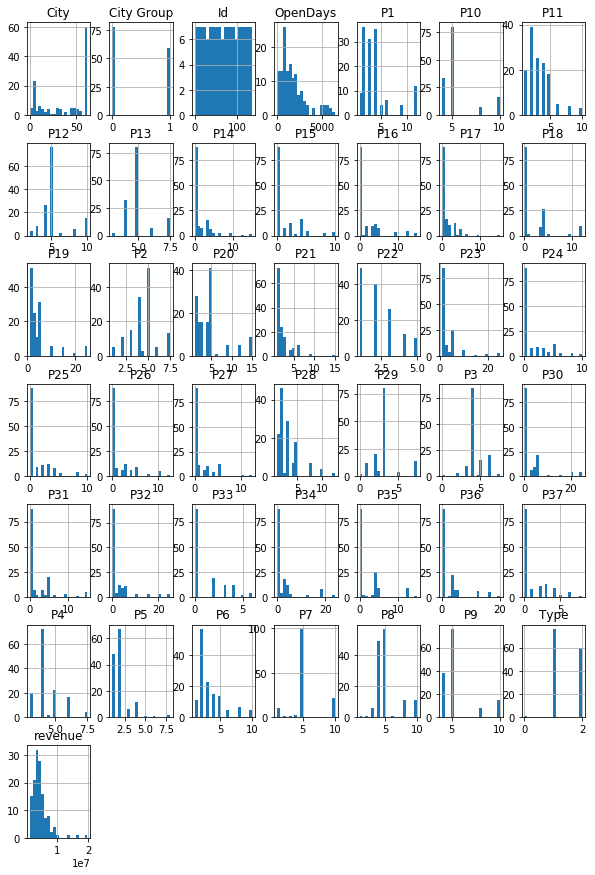

In [17]:
# 各項目と'revenue'の相関

train_df.hist(figsize=(10, 15), bins=20)


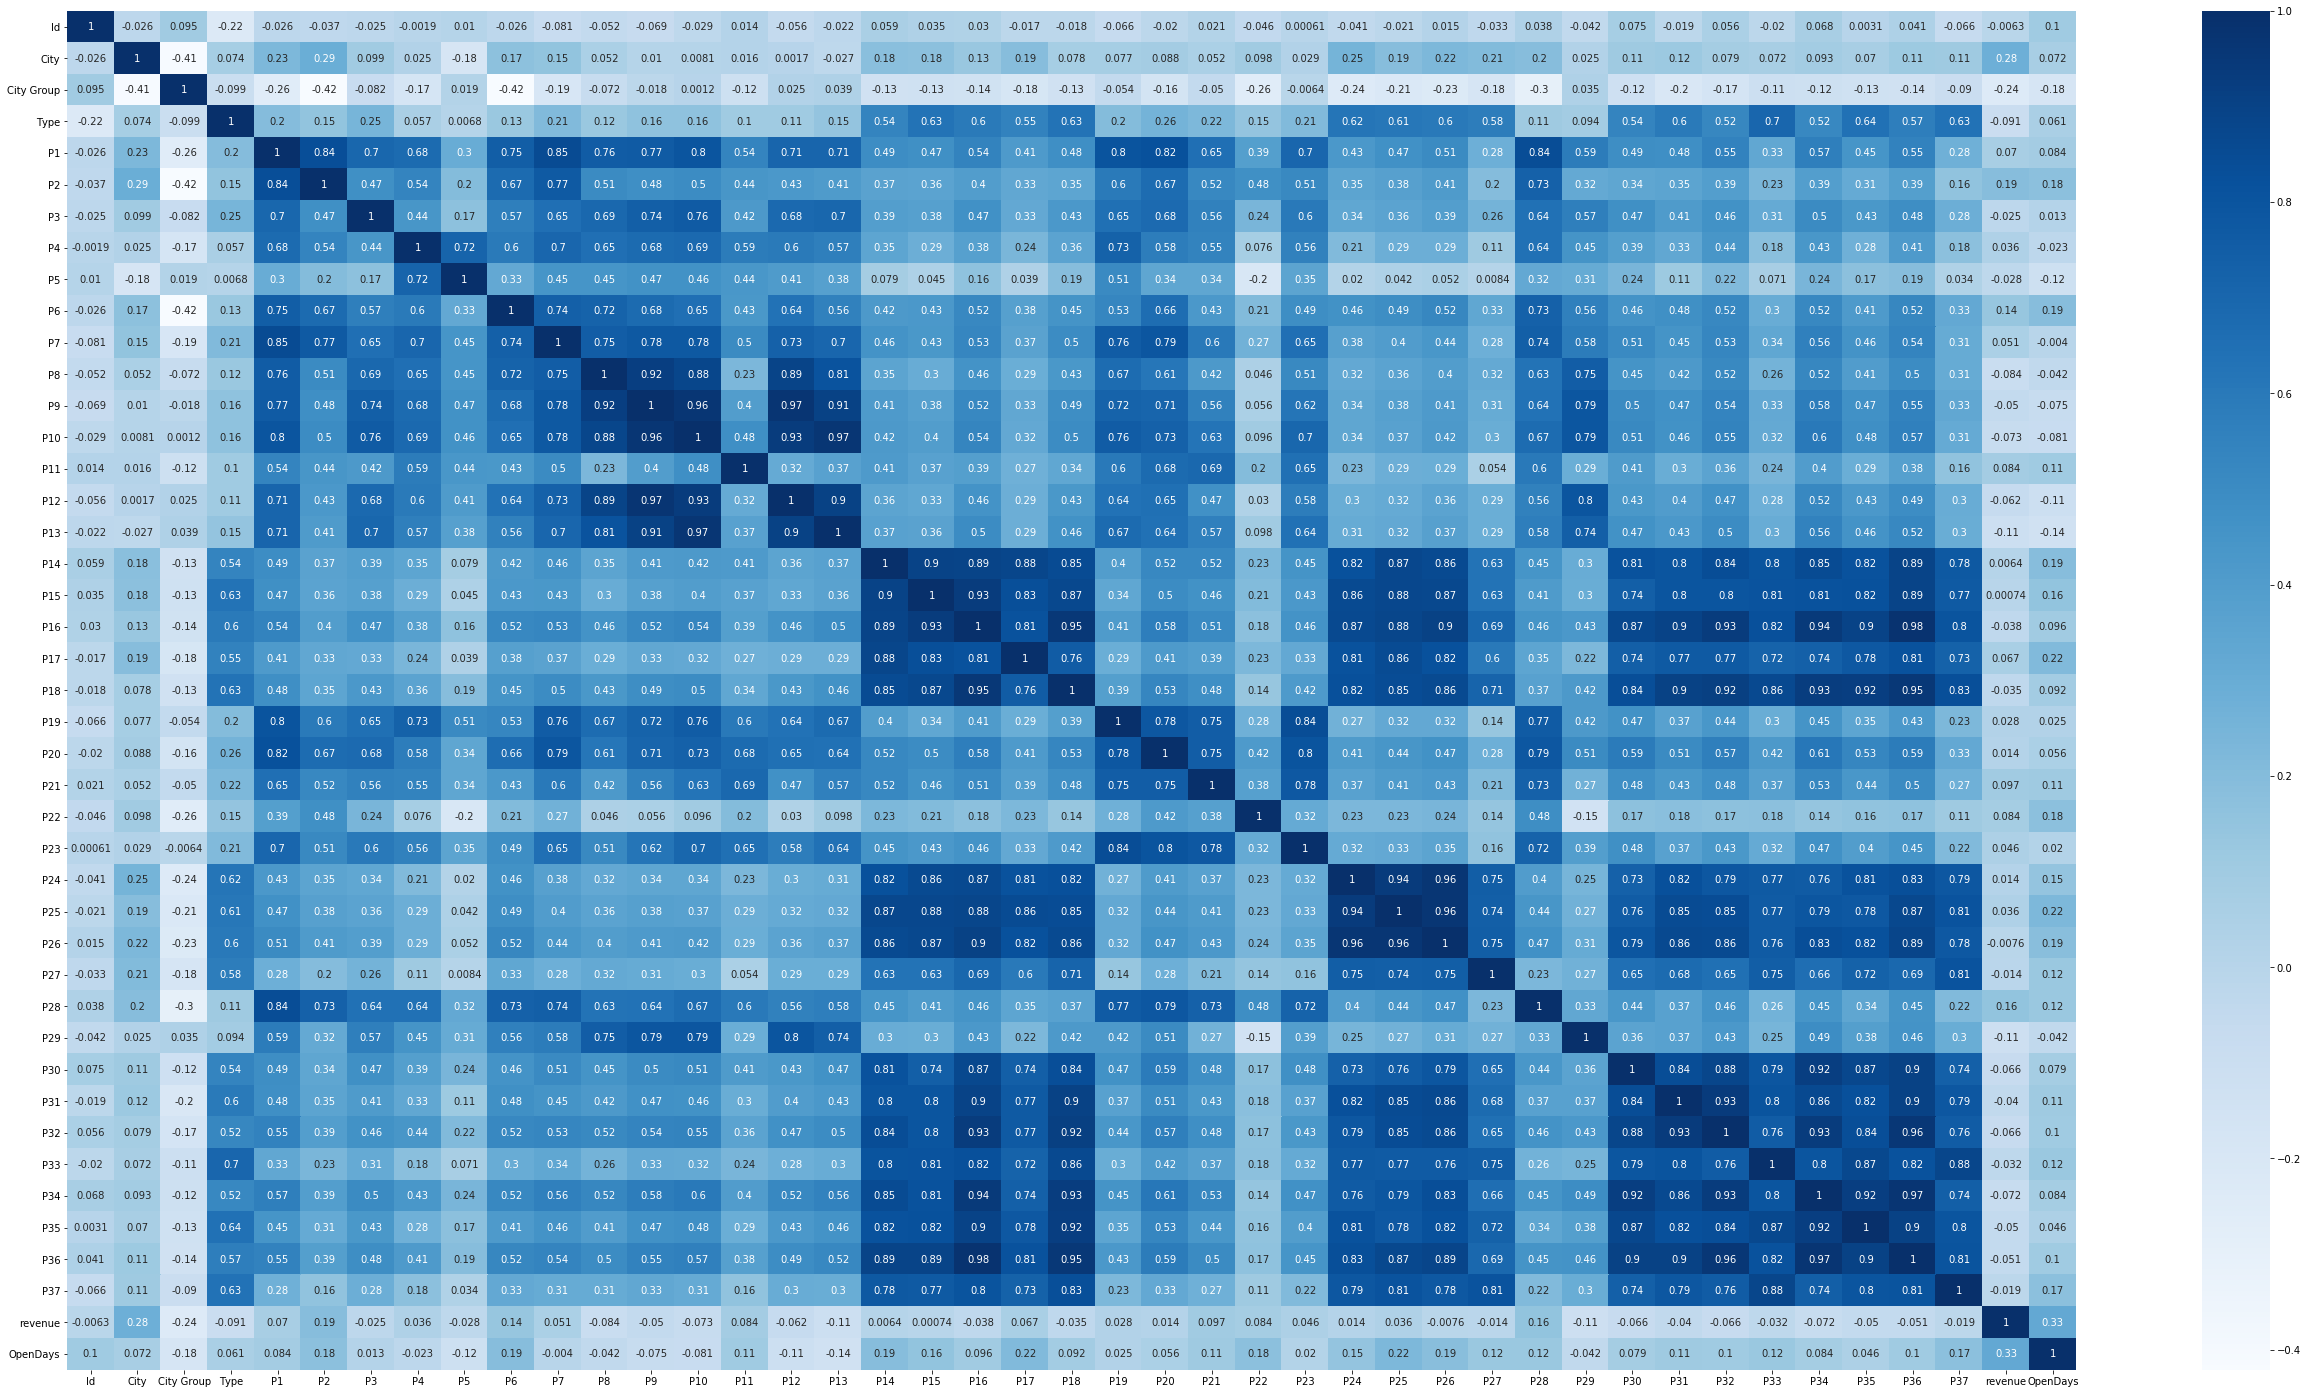

In [18]:
# 各項目と'revenue'の相関
import seaborn as sns
import matplotlib.pyplot as plt
#sns.heatmap(train_df.corr(),annot = True, cmap='cool', figsize=(10, 10))

plt.figure(figsize=(45,25))
sns.heatmap(train_df.corr(), annot = True, cmap='Blues')
# P同士は相関しているが、revenueとの関係は薄い。
# revenueとの相関が強いのは、CityとOpenDays

In [19]:
# P1-P37を主成分分析してみる
import numpy as np
from sklearn.decomposition import PCA

# データの用意
combine.columns
X = combine.loc[:, ['P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37']]
print(X.shape)

print("before")
print("mean: ", X.mean(axis=0), "\nstd: ", X.std(axis=0))

# 標準化
# Xに、Xを標準化したデータを代入
X = (X - X.mean(axis=0)) / X.std(axis=0)

print("after")
print("mean: ", X.mean(axis=0), "\nstd: ", X.std(axis=0))

(100137, 37)
before
mean:  P1     4.087930
P2     4.428059
P3     4.215465
P4     4.395992
P5     1.989614
P6     2.882551
P7     5.300678
P8     4.931304
P9     5.251645
P10    5.459011
P11    3.311653
P12    5.061765
P13    5.086621
P14    1.280276
P15    1.305641
P16    1.747336
P17    1.156715
P18    1.708789
P19    5.190729
P20    4.570828
P21    2.542007
P22    2.430101
P23    3.639684
P24    1.234639
P25    1.244066
P26    1.279927
P27    1.164415
P28    3.233770
P29    3.084070
P30    2.084185
P31    1.194354
P32    1.943437
P33    0.987637
P34    2.109190
P35    1.833099
P36    1.969222
P37    0.973696
dtype: float64 
std:  P1     2.813085
P2     1.428979
P3     0.842452
P4     1.035796
P5     1.065518
P6     1.532502
P7     2.178739
P8     1.718699
P9     1.702825
P10    1.763709
P11    2.067903
P12    1.765647
P13    0.979414
P14    2.497106
P15    2.167272
P16    3.172481
P17    2.432137
P18    3.030907
P19    5.785268
P20    3.612543
P21    2.525471
P22    1.363027
P23    

In [20]:
# 主成分分析のインスタンスを生成。
pca = PCA(n_components = 3)

# データから変換モデルを学習し、変換する。
X_pca = pca.fit_transform(X)

print(X_pca.shape)
X_pca

(100137, 3)


array([[ 1.33684316, -2.20726639, -0.7239451 ],
       [-2.51241142,  0.55009438,  0.01809652],
       [-3.04927428,  0.24087127, -1.31557085],
       ...,
       [ 1.91997344, -3.04379827,  2.057372  ],
       [ 4.38678375,  7.6797793 , -0.14429034],
       [-0.42404914, -0.88070352,  0.28286378]])

In [21]:
combine['P_pca0'] = X_pca[:, 0]
combine['P_pca1'] = X_pca[:, 1]
combine['P_pca2'] = X_pca[:, 2]
combine

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P33,P34,P35,P36,P37,revenue,OpenDays,P_pca0,P_pca1,P_pca2
0,0,1999-07-17,60,0,2,4,5.0,4.0,4.0,2,...,5,5,4,3,4,5653753.0,5306,1.336843,-2.207266,-0.723945
1,1,2008-02-14,4,0,1,4,5.0,4.0,4.0,1,...,0,0,0,0,0,6923131.0,2172,-2.512411,0.550094,0.018097
2,2,2013-03-09,14,1,2,2,4.0,2.0,5.0,2,...,0,0,0,0,0,2055379.0,322,-3.049274,0.240871,-1.315571
3,3,2012-02-02,52,1,2,6,4.5,6.0,6.0,4,...,6,18,12,12,6,2675511.0,723,12.116808,0.700569,-3.882390
4,4,2009-05-09,21,1,2,3,4.0,3.0,4.0,2,...,2,3,4,3,3,4316715.0,1722,0.320300,-2.453045,-1.692728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100132,99995,2000-01-05,5,1,1,5,5.0,4.0,4.0,2,...,0,0,0,0,0,NaN,5134,-2.661188,0.183104,0.707120
100133,99996,2011-07-18,42,1,2,1,2.0,4.0,3.0,1,...,0,4,0,0,0,NaN,922,-3.336278,-1.103234,-1.614376
100134,99997,2012-12-29,60,0,2,4,5.0,4.0,4.0,1,...,2,4,4,4,2,NaN,392,1.919973,-3.043798,2.057372
100135,99998,2013-10-12,60,0,1,12,7.5,6.0,6.0,4,...,4,0,0,0,0,NaN,105,4.386784,7.679779,-0.144290


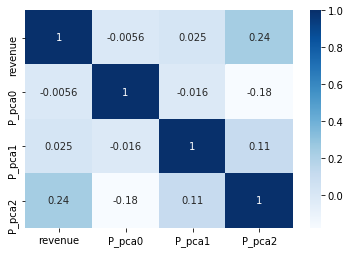

In [22]:
train_df = combine.loc[combine['revenue'].isnull() == False]
test_df = combine.loc[combine['revenue'].isnull() == True]
sns.heatmap(train_df[['revenue', 'P_pca0', 'P_pca1', 'P_pca2']].corr(), annot = True, cmap='Blues')


In [24]:
# トレーニングデータ、テストデータの作成

train_df = combine.loc[combine['revenue'].isnull() == False]
test_df = combine.loc[combine['revenue'].isnull() == True]
print('Train Shape: {}'.format(train_df.shape))
print('Test Shape: {}'.format(test_df.shape))

x = train_df.drop(['revenue', 'Id', 'Open Date', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37'], axis=1)
y = train_df['revenue']
test = test_df.drop(['revenue', 'Id', 'Open Date', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37'], axis=1)

model = RandomForestRegressor(n_estimators=150)
model.fit(x, y)
model.score(x, y)

Train Shape: (137, 47)
Test Shape: (100000, 47)


0.8688164679549368

In [25]:
# RandomForestRegressorの適応
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=150)
model.fit(x, y)

Y_pred = model.predict(test)
acc = model.score(x, y)

print(acc)

0.8656470546874424


In [26]:
# モデルをCSVファイルに保存

submission = pd.DataFrame({
    'Id': test_df['Id'],
    'Prediction': Y_pred
})

submission.to_csv('./restaurant-revenue-prediction/submission2.csv', index=False)

submission

,Id,Prediction
137,0,3.540604e+06
138,1,3.189983e+06
139,2,3.252034e+06
140,3,3.343330e+06
141,4,2.888889e+06
...,...,...
100132,99995,8.752766e+06
100133,99996,3.120290e+06
100134,99997,3.807032e+06
100135,99998,3.906677e+06
